In [3]:
!pip install torch torchvision torchaudio
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\SAI KARTHIK\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\SAI KARTHIK\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\SAI KARTHIK\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\SAI KARTHIK\anaconda3\Lib\sit

In [5]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [4]:
import torch
print(torch.cuda.is_available())


False


In [6]:
tensor = torch.tensor([1, 2, 3]).to(device)


NameError: name 'device' is not defined

In [ ]:
import tensorflow as tf

with tf.device('/GPU:0'):
    # Your TensorFlow code here


In [1]:
import tensorflow as tf
import numpy as np
import librosa
import IPython.display as ipd
import os
from os.path import isfile, join
from tensorflow import keras
import shutil
from pathlib import Path
import subprocess

In [2]:
data_directory = "C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches"
audio_path = "C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\audio"
noise_path = "C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise"

In [3]:
audio_path

'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\audio'

In [4]:
voicefile_names = os.listdir(audio_path)

In [5]:
voicefile_names

['Benjamin_Netanyau',
 'Jens_Stoltenberg',
 'Julia_Gillard',
 'Magaret_Tarcher',
 'Nelson_Mandela']

In [6]:
noisefile_names = os.listdir(noise_path)
noisefile_names

['other', '_background_noise_']

In [7]:
voice_files_count = []
for i in voicefile_names:
    p = os.listdir(audio_path+"/"+i)
    len_class = len(p)
    voice_files_count.append(len_class)

In [8]:
voice_files_count

[1500, 1500, 1501, 1500, 1500]

In [9]:
noise_files_count = []
for i in noisefile_names:
    p = os.listdir(noise_path+"/"+i)
    len_class = len(p)
    noise_files_count.append(len_class)
noise_files_count

[4, 8]

In [10]:
import plotly.express as px
import numpy

random_x = voicefile_names
random_y = voice_files_count

fig = px.bar(random_x, y =  random_y)
fig.show()

In [14]:
valid_split = 0.2
shuffle_seed = 43
sample_rate = 16000
scale = 0.5
batch_size = 128
epochs = 100

In [15]:
#Get the list of all noise files

In [12]:
import random
noise_paths= [] 
for subdir in os.listdir(noise_path):
    subdir_path = Path(noise_path) / subdir
    if os.path.isdir(subdir_path):
        noise_paths +=[
            os.path.join(subdir_path, filepath)
            for filepath in os.listdir(subdir_path)
            if filepath.endswith(".wav")
        ]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1188289955.py, line 7)

In [17]:
noise_paths

['C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\other\\exercise_bike.wav',
 'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\other\\exercise_bike_resampled.wav',
 'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\other\\pink_noise.wav',
 'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\other\\pink_noise_resampled.wav',
 'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\_background_noise_\\10convert.com_Audience-Claps_daSG5fwdA7o.wav',
 'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\_background_noise_\\10convert.com_Audience-Claps_daSG5fwdA7o_resampled.wav',
 'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\_background_noise_\\doing_the_dishes.wav',
 'C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\_background_noise_\\doing_the_dishes_resampled.wav',
 'C:\\Users\\S

In [18]:
import librosa
x, sr = librosa.load("C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\other\\exercise_bike.wav")

In [19]:
print(x.shape)
print(sr)

(1350648,)
22050


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

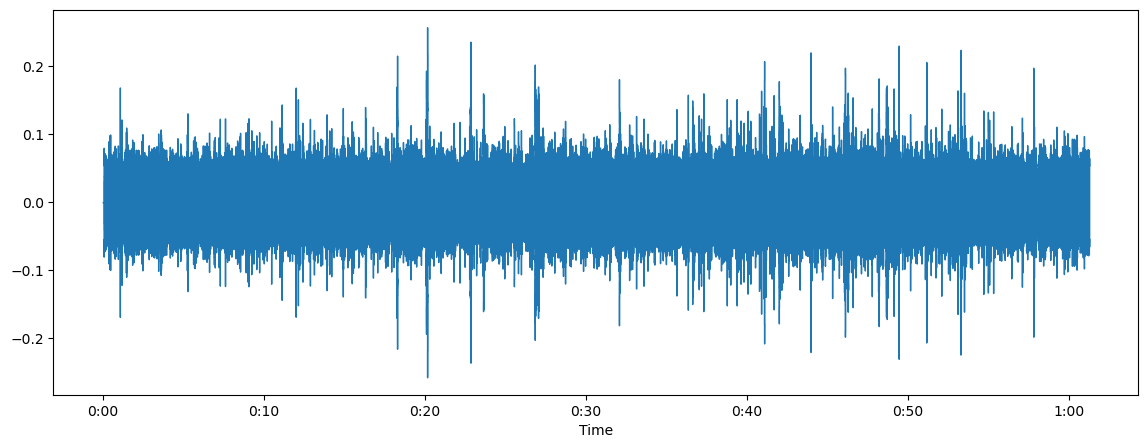

In [21]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr)

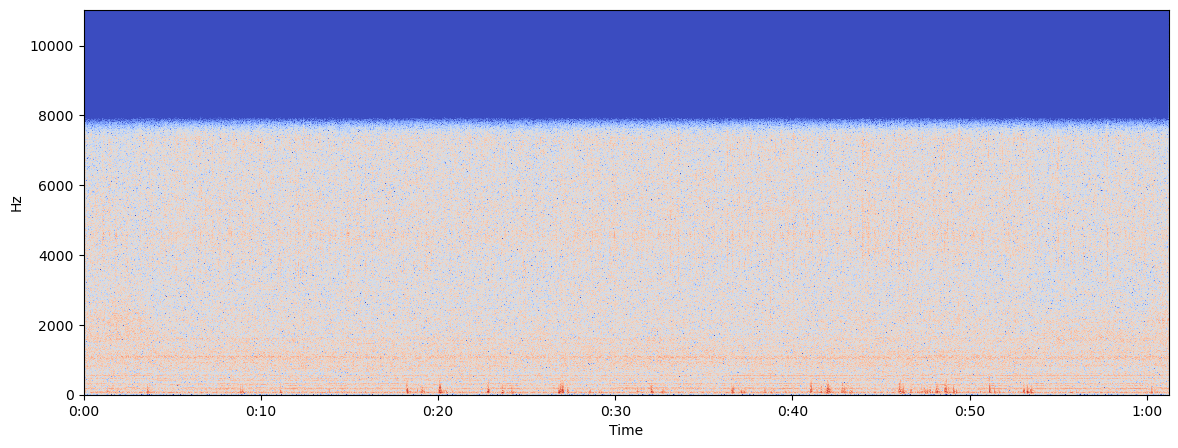

In [22]:
X= librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")

In [23]:
import IPython.display as ipd
ipd.Audio("C:\\Users\\SAI KARTHIK\\Downloads\\archive (11)\\16000_pcm_speeches\\noise\\other\\exercise_bike.wav")

In [ ]:
#Split noise into chunks of 16000 steps each

In [24]:
import librosa
import soundfile as sf
import tensorflow as tf

def resample_wav(input_path, output_path, target_sampling_rate):
    y, sr = librosa.load(input_path, sr=target_sampling_rate)
    sf.write(output_path, y, target_sampling_rate)

def load_noise_sample(path, sample_rate):
    sample, sampling_rate = tf.audio.decode_wav(
        tf.io.read_file(path),
        desired_channels=1
    )
    print("Sampling rate of original audio is {}".format(sampling_rate))
    if sampling_rate == sample_rate:
        print("Shape:", sample.shape[0])
        slices = int(sample.shape[0] / sample_rate)
        print("Slices:", slices)
        sample = tf.split(sample[: slices * sample_rate], slices)
        return sample
    else:
        print("Resampling audio...")
        resampled_path = path.replace('.wav', '_resampled.wav')
        resample_wav(path, resampled_path, sample_rate)
        return load_noise_sample(resampled_path, sample_rate)

sample_rate = 16000  # Target sampling rate

noises = []
for path in noise_paths:
    sample = load_noise_sample(path, sample_rate)
    if sample:
        noises.extend(sample)
noises = tf.stack(noises)


Sampling rate of original audio is 22050
Resampling audio...
Sampling rate of original audio is 16000
Shape: 980063
Slices: 61
Sampling rate of original audio is 16000
Shape: 980063
Slices: 61
Sampling rate of original audio is 22050
Resampling audio...
Sampling rate of original audio is 16000
Shape: 960000
Slices: 60
Sampling rate of original audio is 16000
Shape: 960000
Slices: 60
Sampling rate of original audio is 44100
Resampling audio...
Sampling rate of original audio is 16000
Shape: 260686
Slices: 16
Sampling rate of original audio is 16000
Shape: 260686
Slices: 16
Sampling rate of original audio is 22050
Resampling audio...
Sampling rate of original audio is 16000
Shape: 1522931
Slices: 95
Sampling rate of original audio is 16000
Shape: 1522931
Slices: 95
Sampling rate of original audio is 22050
Resampling audio...
Sampling rate of original audio is 16000
Shape: 988892
Slices: 61
Sampling rate of original audio is 16000
Shape: 988892
Slices: 61
Sampling rate of original audio i

In [ ]:
#dataset generation

In [25]:
def paths_and_labels_to_dataset(audio_path, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_path)
    audio_ds = path_ds.map(lambda x: path_to_audio(x))
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [26]:
def path_to_audio(path):
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav(audio, 1, sample_rate)
    return audio

In [27]:
#add noise to dataset

In [28]:
def add_noise(audio, noises=None, scale=0.5):
    if noises is not None:
        tf_rnd = tf.random.uniform(
            (tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32
        )
        noise = tf.gather(noises, tf_rnd, axis=0)
        prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1)
        prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1)
        
        audio= audio + noise * prop *scale
    return audio

In [29]:
def audio_to_fft(audio):
    audio = tf.squeeze(audio, axis=-1)
    fft = tf.signal.fft(
        tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)
    )
    fft = tf.expand_dims(fft, axis=-1)
    return tf.math.abs(fft[:, : (audio.shape[1] // 2), :])

In [30]:
class_names = os.listdir(audio_path)
print(class_names,)

audio_paths= [] 
labels = []
for label, name in enumerate(class_names):
    print("Speaker:",(name))
    dir_path = Path(audio_path) / name
    speaker_sample_paths = [
        os.path.join(dir_path, filepath)
        for filepath in os.listdir(dir_path)
        if filepath.endswith(".wav")
    ]
    audio_paths+=speaker_sample_paths
    labels+=[label] * len(speaker_sample_paths)

['Benjamin_Netanyau', 'Jens_Stoltenberg', 'Julia_Gillard', 'Magaret_Tarcher', 'Nelson_Mandela']
Speaker: Benjamin_Netanyau
Speaker: Jens_Stoltenberg
Speaker: Julia_Gillard
Speaker: Magaret_Tarcher
Speaker: Nelson_Mandela


In [31]:
#Shuffle to generate random dataset
rng = np.random.RandomState(shuffle_seed)
rng.shuffle(audio_paths)
rng = np.random.RandomState(shuffle_seed)
rng.shuffle(labels)

In [32]:
#split into training and validation
num_val_samples = int(valid_split * len(audio_paths))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]

valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]

In [33]:
#create datasets, one for training and the other for validation
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(
    batch_size
)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32*8, seed=shuffle_seed).batch(32)

In [ ]:
#feature extraction

In [34]:
#adding noise to the training set
train_ds = train_ds.map(
    lambda x, y: (add_noise(x, noises, scale=scale), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
)

# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE
)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE
)
valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)

**Model**

In [35]:
from tensorflow.keras.layers import Conv1D

In [36]:
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)


model = build_model((sample_rate // 2, 1), len(class_names))

model.summary()

# Compile the model using Adam's default learning rate
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Add callbacks:
# 'EarlyStopping' to stop training when the model is not enhancing anymore
# 'ModelCheckPoint' to always keep the model that has the best val_accuracy
model_save_filename = "Model_SpeakerRecog_Save.keras"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)            │ (None, 8000, 1)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_15 (Conv1D)            │ (None, 8000, 128)         │             512 │ input[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_10 (Activation)    │ (None, 8000, 128)         │               0 │ conv1d_15[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_16 (Conv1D)            │ (None, 8000, 128)         │          49,280 │ activation_10[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_11 (Activation)    │ (None, 8000, 128)         │               0 │ conv1d_16[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_17 (Conv1D)            │ (None, 8000, 128)         │          49,280 │ activation_11[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_14 (Conv1D)            │ (None, 8000, 128)         │             256 │ input[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_4 (Add)                   │ (None, 8000, 128)         │               0 │ conv1d_17[0][0],           │
│                               │                           │                 │ conv1d_14[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_12 (Activation)    │ (None, 8000, 128)         │               0 │ add_4[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_4               │ (None, 4000, 128)         │               0 │ activation_12[0][0]        │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_pooling1d             │ (None, 1333, 128)         │               0 │ max_pooling1d_4[0][0]      │
│ (AveragePooling1D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 170624)            │               0 │ average_pooling1d[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 256)               │      43,680,000 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 128)               │          32,896 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 5)                 │             645 │ dense_1[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 43,812,869 (167.13 MB)

 Trainable params: 43,812,869 (167.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(
    train_ds,
    epochs=epochs,
    validation_data=valid_ds,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb],
)